In [2]:
import os 
import cv2
import PIL
# import hickle
import SimpleITK as sitk
from pylab import *
import matplotlib.pyplot as plt
from skimage.measure import regionprops, label
from skimage.util import img_as_float
from skimage.segmentation import mark_boundaries, slic, find_boundaries, join_segmentations
from skimage.measure import regionprops
import matplotlib.patches as mpatches
from skimage.color import label2rgb
from PIL import ImageDraw
import numpy as np
import nibabel as nib



In [3]:
img = nib.load(r'C:\Users\Visagio\Desktop\dt\output\testemask.nii')
b = img.get_fdata()
a = np.array(b)
stacked_img = np.stack((a,)*3, axis=-1)
segments = slic(stacked_img, n_segments=5000, compactness=1, 
                sigma=5, convert2lab=True, start_label=1, slic_zero=True)


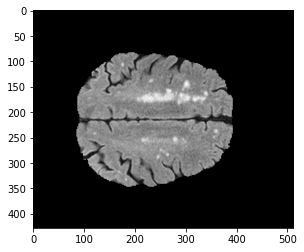

In [4]:
plt.imshow(a[:, :, 20], cmap="gray")

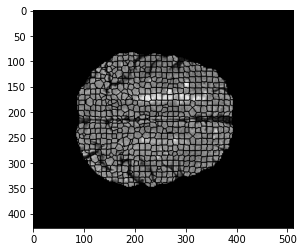

In [6]:
img_seg = mark_boundaries(stacked_img[:, :, 20], segments[:, :, 20])
plt.imshow(img_seg[:, :, 2], cmap="gray")


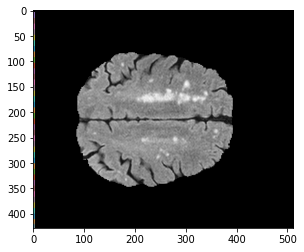

In [325]:
regions = regionprops(segments[:, :, 20])
plt.figure()

centroids = []
for region in regionprops(segments[:, :, 20]):
    cx, cy = map(lambda p: int(p*1), (region.centroid[0], region.centroid[1]))
    centroids.append((cx, cy))
for c in centroids:
    plt.plot(c)
plt.imshow(a[:, :, 20], cmap="gray")